### Questions:
    1. How many entries in the text dataset?
    2. How many catagories in the text dataset?
    3. Is this dataset balanced or unbalanced?
    4. How many tokens and types in the text?
    5. What's the most commam words in the text before and after stopwords removed?

In [2]:
import nltk
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
senti_known= pd.read_csv('train.tsv/train.tsv',delimiter='\t',encoding='utf-8')
senti_unknown = pd.read_csv('test.tsv/test.tsv',delimiter='\t',encoding='utf-8')

In [3]:
senti_known.info()
senti_known.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
Sentiment = set()
for i in senti_known.Sentiment:
    Sentiment.add(i)
print(Sentiment)

{0, 1, 2, 3, 4}


- 0 : negative
- 1 : somewhat negative
- 2 : neutral
- 3 : somewhat positive
- 4 : positive

(array([  7072.,      0.,  27273.,      0.,      0.,  79582.,      0.,
         32927.,      0.,   9206.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

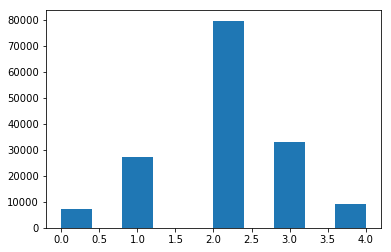

In [7]:
plt.hist(senti_known.Sentiment)

In [8]:
import string
from collections import Counter
from nltk.corpus import stopwords

translator = str.maketrans('', '', string.punctuation)
def get_tokens(text):
    #remove the punctuation using the character deletion step of translate
    text_lower=text.lower()
    no_punctuation = text_lower.translate(translator)
    tokens = nltk.word_tokenize(no_punctuation)
    return tokens

tokens=list()
for text in senti_known.Phrase:
    token = get_tokens(text)
    tokens.extend(token)
    
count = Counter(tokens)
print(count.most_common(10))

[('the', 51220), ('a', 36130), ('of', 32308), ('and', 31763), ('to', 22448), ('s', 17002), ('in', 13745), ('is', 13447), ('that', 12327), ('it', 11677)]


In [10]:
print('There are {} tokens in the text:'.format(len(tokens)))

There are 1047954 tokens in the text:


In [12]:
token_set=set()
for token in tokens:
    token_set.add(token)
print('There are {} types in the text:'.format(len(token_set)))

There are 16402 types in the text:


In [13]:
filtered = [w for w in tokens if not w in stopwords.words('english')]
count = Counter(filtered)
print(count.most_common(100))

[('film', 6689), ('movie', 5905), ('nt', 3970), ('one', 3609), ('like', 3071), ('story', 2520), ('rrb', 2438), ('lrb', 2098), ('good', 2043), ('characters', 1882), ('much', 1862), ('time', 1747), ('comedy', 1721), ('even', 1597), ('little', 1575), ('funny', 1522), ('way', 1511), ('life', 1484), ('make', 1396), ('movies', 1345), ('love', 1296), ('new', 1278), ('enough', 1248), ('work', 1243), ('us', 1234), ('bad', 1211), ('something', 1152), ('would', 1118), ('never', 1114), ('director', 1099), ('many', 1094), ('people', 1073), ('made', 1060), ('best', 1059), ('two', 1032), ('makes', 1019), ('action', 1005), ('may', 986), ('plot', 979), ('films', 979), ('could', 969), ('character', 968), ('see', 957), ('well', 944), ('world', 917), ('better', 913), ('audience', 912), ('drama', 894), ('look', 888), ('really', 888), ('without', 872), ('sense', 869), ('every', 849), ('great', 838), ('humor', 827), ('long', 821), ('first', 819), ('another', 818), ('feel', 808), ('get', 805), ('minutes', 802

In [14]:
txt = ''
for token in filtered:
    txt += (token+' ')

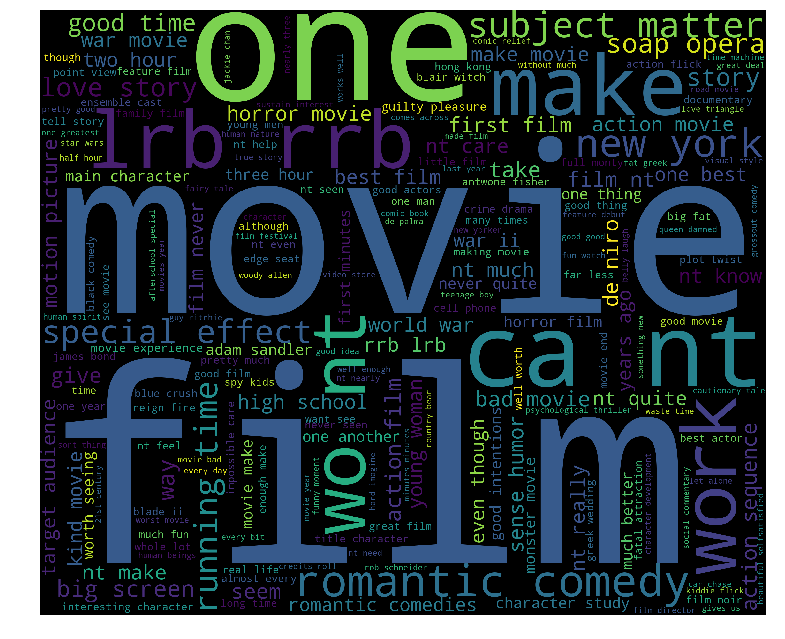

In [15]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(txt)
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Conclusion:

There are totally 156060 entries(reviews), and there are five sentiment labels: positive, somewhat positive, neutral, somewhat negtive, negtive. This dataset is unbalanced since the review amount of each catagories are very different. There are 1047954 tokens and 16402 types in the text. 

Before stopwords are removed, the most commom 10 words and number of the words are in the following list.
[('the', 51220), ('a', 36130), ('of', 32308), ('and', 31763), ('to', 22448), ('s', 17002), ('in', 13745), ('is', 13447), ('that', 12327), ('it', 11677)]. 

And after stopwords are removed, the most commom 100 words and number of the words are in the following list.
[('film', 6689), ('movie', 5905), ('nt', 3970), ('one', 3609), ('like', 3071), ('story', 2520), ('rrb', 2438), ('lrb', 2098), ('good', 2043), ('characters', 1882), ('much', 1862), ('time', 1747), ('comedy', 1721), ('even', 1597), ('little', 1575), ('funny', 1522), ('way', 1511), ('life', 1484), ('make', 1396), ('movies', 1345), ('love', 1296), ('new', 1278), ('enough', 1248), ('work', 1243), ('us', 1234), ('bad', 1211), ('something', 1152), ('would', 1118), ('never', 1114), ('director', 1099), ('many', 1094), ('people', 1073), ('made', 1060), ('best', 1059), ('two', 1032), ('makes', 1019), ('action', 1005), ('may', 986), ('plot', 979), ('films', 979), ('could', 969), ('character', 968), ('see', 957), ('well', 944), ('world', 917), ('better', 913), ('audience', 912), ('drama', 894), ('look', 888), ('really', 888), ('without', 872), ('sense', 869), ('every', 849), ('great', 838), ('humor', 827), ('long', 821), ('first', 819), ('another', 818), ('feel', 808), ('get', 805), ('minutes', 802), ('big', 779), ('man', 772), ('performances', 765), ('cast', 760), ('real', 758), ('ever', 755), ('still', 748), ('hollywood', 746), ('nothing', 724), ('human', 716), ('performance', 710), ('fun', 703), ('might', 698), ('old', 691), ('less', 688), ('screen', 688), ('things', 687), ('often', 682), ('kind', 668), ('moments', 667), ('script', 664), ('family', 663), ('also', 659), ('seen', 659), ('american', 650), ('far', 649), ('interesting', 649), ('acting', 648), ('rather', 641), ('original', 641), ('watch', 628), ('heart', 620), ('almost', 619), ('back', 617), ('young', 616), ('emotional', 615), ('entertaining', 613), ('material', 610), ('end', 608)]. 